<h1>ENB36 - CNNs</h1>
<h2> Kernel size</h2>

In [4]:
import tensorflow as tf
import keras
from keras import models
from keras import layers

import numpy as np
import os
import csv

import pickle
import time as tm

import matplotlib.pyplot as plt
import pre_process as pp

<h2> Loading the datasets</h2>

In [5]:
with open('train_data.txt', 'rb') as fp:
    train_data = pickle.load(fp)
    
with open('train_labels.txt', 'rb') as fp:
    train_labels = pickle.load(fp)
    
with open('test_data.txt', 'rb') as fp:
    test_data = pickle.load(fp)
    
with open('test_labels.txt', 'rb') as fp:
    test_labels = pickle.load(fp)

<h2>k-fold params</h2>

In [6]:
k = 4
num_val_samples = len(train_data)
print(num_val_samples)
val_split_size = num_val_samples/k
val_split_size = int(val_split_size)
print(val_split_size)
type(val_split_size)

72
18


int

<h2>Experiment1: a single layer</h2>

In [62]:
net1 = models.Sequential()
net1.add(layers.Conv1D(filters = 48, kernel_size=2, activation='relu', input_shape=(480,6)))
net1.add(layers.MaxPooling1D(pool_size=2))
net1.add(layers.Flatten())
net1.add(layers.Dense(7, activation = 'softmax'))
net1.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_8 (Conv1D)            (None, 479, 48)           624       
_________________________________________________________________
max_pooling1d_11 (MaxPooling (None, 239, 48)           0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 11472)             0         
_________________________________________________________________
dense_11 (Dense)             (None, 7)                 80311     
Total params: 80,935
Trainable params: 80,935
Non-trainable params: 0
_________________________________________________________________


In [63]:
net1.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
net1.save_weights('net1.h5')  # each split will start with same weights so can directly compare results

In [64]:

histories1 = []
results_list1 = []
index = 0
fold = val_split_size



start = tm.time()

for i in range (k):
    print(i)
    val_fold = train_data[index:fold]
    train_fold = np.delete(train_data, np.s_[index:fold],0)

    val_tgt = train_labels[index:fold]
    train_tgt = np.delete(train_labels, np.s_[index:fold])
    
    
    net1.load_weights('net1.h5')
    history = net1.fit(train_fold, train_tgt, epochs = 50, validation_data = (val_fold, val_tgt))

    histories1.append(history)
    
    
    results = net1.evaluate(test_data, test_labels)
    results_list1.append(results)
    print(results)
    
    index = index + val_split_size
    fold = fold + val_split_size
    
finish = tm.time()
duration1 = finish - start

0
Train on 54 samples, validate on 18 samples
Epoch 1/50
54/54 [==============================] - 0s 4ms/step - loss: 2.0000 - accuracy: 0.1296 - val_loss: 1.7929 - val_accuracy: 0.3333
Epoch 2/50
54/54 [==============================] - 0s 334us/step - loss: 1.8328 - accuracy: 0.3333 - val_loss: 1.6718 - val_accuracy: 0.3333
Epoch 3/50
54/54 [==============================] - 0s 334us/step - loss: 1.6977 - accuracy: 0.3704 - val_loss: 1.6239 - val_accuracy: 0.4444
Epoch 4/50
54/54 [==============================] - 0s 315us/step - loss: 1.5988 - accuracy: 0.4815 - val_loss: 1.5702 - val_accuracy: 0.4444
Epoch 5/50
54/54 [==============================] - 0s 352us/step - loss: 1.4958 - accuracy: 0.5556 - val_loss: 1.4768 - val_accuracy: 0.4444
Epoch 6/50
54/54 [==============================] - 0s 315us/step - loss: 1.3886 - accuracy: 0.5741 - val_loss: 1.3802 - val_accuracy: 0.4444
Epoch 7/50
54/54 [==============================] - 0s 334us/step - loss: 1.3144 - accuracy: 0.5370 - va

54/54 [==============================] - 0s 352us/step - loss: 0.9512 - accuracy: 0.6852 - val_loss: 1.3705 - val_accuracy: 0.5000
Epoch 14/50
54/54 [==============================] - 0s 361us/step - loss: 0.8902 - accuracy: 0.8148 - val_loss: 1.3413 - val_accuracy: 0.3889
Epoch 15/50
54/54 [==============================] - 0s 334us/step - loss: 0.8345 - accuracy: 0.7037 - val_loss: 1.3130 - val_accuracy: 0.3333
Epoch 16/50
54/54 [==============================] - 0s 335us/step - loss: 0.7969 - accuracy: 0.7037 - val_loss: 1.2473 - val_accuracy: 0.3889
Epoch 17/50
54/54 [==============================] - 0s 334us/step - loss: 0.7556 - accuracy: 0.7593 - val_loss: 1.1492 - val_accuracy: 0.6111
Epoch 18/50
54/54 [==============================] - 0s 341us/step - loss: 0.7287 - accuracy: 0.8333 - val_loss: 1.0693 - val_accuracy: 0.6667
Epoch 19/50
54/54 [==============================] - 0s 319us/step - loss: 0.6803 - accuracy: 0.9074 - val_loss: 1.0417 - val_accuracy: 0.6667
Epoch 20/50

In [65]:
avg = np.mean(results_list1, axis=0)
std_dev = np.std(results_list1, axis=0)
print('Average loss and accuracy scores were: ', avg)
print('Standard deviation for loss & accuracy: ', std_dev)
print('Duration in seconds: ', int(duration1))

Average loss and accuracy scores were:  [0.57990376 0.75000001]
Standard deviation for loss & accuracy:  [0.068342   0.05527708]
Duration in seconds:  4


In [66]:
net1.save('enb36-1.h5')

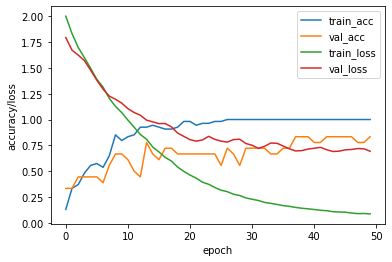

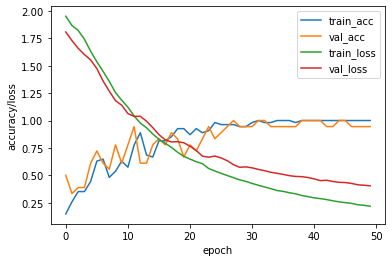

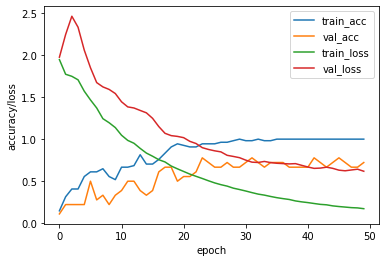

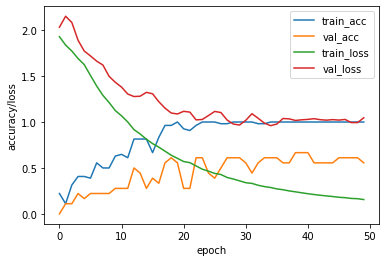

In [67]:
for history in histories1:
    pp.plot_hist(history)

<h2> Expriment2:</h2>

In [51]:
net2 = models.Sequential()
net2.add(layers.Conv1D(filters = 48, kernel_size=6, activation='relu', input_shape=(480,6)))
net2.add(layers.MaxPooling1D(pool_size=2))
net2.add(layers.Flatten())
net2.add(layers.Dense(7, activation = 'softmax'))
net2.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_6 (Conv1D)            (None, 475, 48)           1776      
_________________________________________________________________
max_pooling1d_9 (MaxPooling1 (None, 237, 48)           0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 11376)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 7)                 79639     
Total params: 81,415
Trainable params: 81,415
Non-trainable params: 0
_________________________________________________________________


In [52]:
net2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
net2.save_weights('net2.h5')  # each split will start with same weights so can directly compare results

In [53]:
#net2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
#net2.save_weights('net2.h5')  # each split will start with same weights so can directly compare results

histories2 = []
results_list2 = []
index = 0
fold = val_split_size



start = tm.time()

for i in range (k):
    print(i)
    val_fold = train_data[index:fold]
    train_fold = np.delete(train_data, np.s_[index:fold],0)

    val_tgt = train_labels[index:fold]
    train_tgt = np.delete(train_labels, np.s_[index:fold])
    
    
    net2.load_weights('net2.h5')
    history = net2.fit(train_fold, train_tgt, epochs = 50, validation_data = (val_fold, val_tgt))

    histories2.append(history)
    
    
    results = net2.evaluate(test_data, test_labels)
    results_list2.append(results)
    print(results)
    
    index = index + val_split_size
    fold = fold + val_split_size

finish = tm.time()
duration2 = finish - start

0
Train on 54 samples, validate on 18 samples
Epoch 1/50
54/54 [==============================] - 0s 3ms/step - loss: 2.0660 - accuracy: 0.1667 - val_loss: 1.7583 - val_accuracy: 0.2222
Epoch 2/50
54/54 [==============================] - 0s 371us/step - loss: 1.8546 - accuracy: 0.2222 - val_loss: 1.6872 - val_accuracy: 0.3333
Epoch 3/50
54/54 [==============================] - 0s 334us/step - loss: 1.7740 - accuracy: 0.3333 - val_loss: 1.7031 - val_accuracy: 0.3333
Epoch 4/50
54/54 [==============================] - 0s 355us/step - loss: 1.6574 - accuracy: 0.4444 - val_loss: 1.5699 - val_accuracy: 0.5000
Epoch 5/50
54/54 [==============================] - 0s 371us/step - loss: 1.4852 - accuracy: 0.7593 - val_loss: 1.4409 - val_accuracy: 0.5000
Epoch 6/50
54/54 [==============================] - 0s 353us/step - loss: 1.3690 - accuracy: 0.7037 - val_loss: 1.3582 - val_accuracy: 0.5556
Epoch 7/50
54/54 [==============================] - 0s 352us/step - loss: 1.2829 - accuracy: 0.6296 - va

54/54 [==============================] - 0s 334us/step - loss: 0.8970 - accuracy: 0.6667 - val_loss: 1.2195 - val_accuracy: 0.5556
Epoch 14/50
54/54 [==============================] - 0s 352us/step - loss: 0.8379 - accuracy: 0.7222 - val_loss: 1.1591 - val_accuracy: 0.5556
Epoch 15/50
54/54 [==============================] - 0s 352us/step - loss: 0.7802 - accuracy: 0.7593 - val_loss: 1.0617 - val_accuracy: 0.6111
Epoch 16/50
54/54 [==============================] - 0s 352us/step - loss: 0.7313 - accuracy: 0.8889 - val_loss: 0.9968 - val_accuracy: 0.6667
Epoch 17/50
54/54 [==============================] - 0s 352us/step - loss: 0.6859 - accuracy: 0.8889 - val_loss: 0.9714 - val_accuracy: 0.6111
Epoch 18/50
54/54 [==============================] - 0s 352us/step - loss: 0.6435 - accuracy: 0.9074 - val_loss: 0.9406 - val_accuracy: 0.6111
Epoch 19/50
54/54 [==============================] - 0s 334us/step - loss: 0.6028 - accuracy: 0.8704 - val_loss: 0.8998 - val_accuracy: 0.6111
Epoch 20/50

In [54]:
avg = np.mean(results_list2, axis=0)
std_dev = np.std(results_list2, axis=0)
print('Average loss and accuracy scores were: ', avg)
print('Standard deviation for loss & accuracy: ', std_dev)
print('Duration in seconds: ', int(duration2))

Average loss and accuracy scores were:  [0.4778008  0.81666668]
Standard deviation for loss & accuracy:  [0.03297391 0.02886751]
Duration in seconds:  4


In [55]:
net2.save('enb36-2.h5')

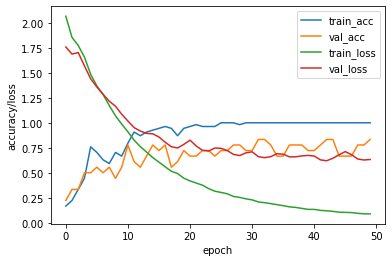

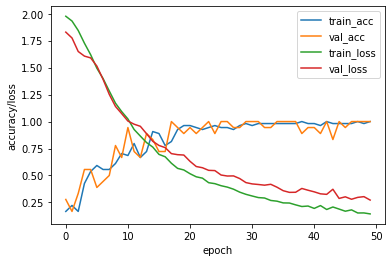

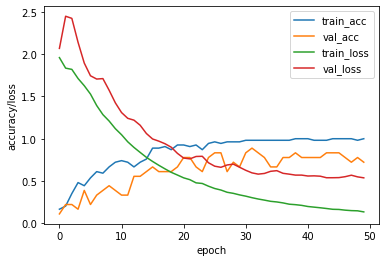

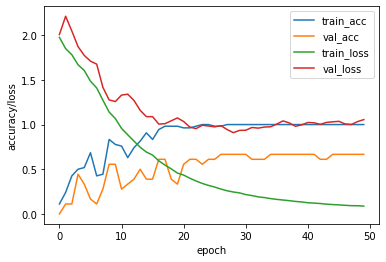

In [56]:
for history in histories2:
    pp.plot_hist(history)

<h2> Expriment3:</h2>

In [57]:
net3 = models.Sequential()
net3.add(layers.Conv1D(filters = 48, kernel_size=8, activation='relu', input_shape=(480,6)))
net3.add(layers.MaxPooling1D(pool_size=2))
net3.add(layers.Flatten())
net3.add(layers.Dense(7, activation = 'softmax'))
net3.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_7 (Conv1D)            (None, 473, 48)           2352      
_________________________________________________________________
max_pooling1d_10 (MaxPooling (None, 236, 48)           0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 11328)             0         
_________________________________________________________________
dense_10 (Dense)             (None, 7)                 79303     
Total params: 81,655
Trainable params: 81,655
Non-trainable params: 0
_________________________________________________________________


In [58]:
net3.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
net3.save_weights('net3.h5')  # each split will start with same weights so can directly compare results

histories3 = []
results_list3 = []
index = 0
fold = val_split_size



start = tm.time()

for i in range (k):
    print(i)
    val_fold = train_data[index:fold]
    train_fold = np.delete(train_data, np.s_[index:fold],0)

    val_tgt = train_labels[index:fold]
    train_tgt = np.delete(train_labels, np.s_[index:fold])
    
    
    net3.load_weights('net3.h5')
    history = net3.fit(train_fold, train_tgt, epochs = 50, validation_data = (val_fold, val_tgt))

    histories3.append(history)
    
    
    results = net3.evaluate(test_data, test_labels)
    results_list3.append(results)
    print(results)
    
    index = index + val_split_size
    fold = fold + val_split_size

finish = tm.time()
duration3 = finish - start

0
Train on 54 samples, validate on 18 samples
Epoch 1/50
54/54 [==============================] - 0s 3ms/step - loss: 2.1128 - accuracy: 0.1852 - val_loss: 1.9381 - val_accuracy: 0.1111
Epoch 2/50
54/54 [==============================] - 0s 352us/step - loss: 1.8717 - accuracy: 0.1667 - val_loss: 1.6832 - val_accuracy: 0.2222
Epoch 3/50
54/54 [==============================] - 0s 352us/step - loss: 1.7780 - accuracy: 0.1667 - val_loss: 1.6147 - val_accuracy: 0.3333
Epoch 4/50
54/54 [==============================] - 0s 371us/step - loss: 1.6660 - accuracy: 0.3333 - val_loss: 1.5331 - val_accuracy: 0.6111
Epoch 5/50
54/54 [==============================] - 0s 371us/step - loss: 1.5127 - accuracy: 0.6296 - val_loss: 1.5138 - val_accuracy: 0.5000
Epoch 6/50
54/54 [==============================] - 0s 352us/step - loss: 1.3836 - accuracy: 0.5370 - val_loss: 1.4504 - val_accuracy: 0.4444
Epoch 7/50
54/54 [==============================] - 0s 371us/step - loss: 1.2667 - accuracy: 0.5370 - va

54/54 [==============================] - 0s 352us/step - loss: 0.9465 - accuracy: 0.7222 - val_loss: 1.2617 - val_accuracy: 0.3889
Epoch 14/50
54/54 [==============================] - 0s 352us/step - loss: 0.8628 - accuracy: 0.7407 - val_loss: 1.1848 - val_accuracy: 0.5000
Epoch 15/50
54/54 [==============================] - 0s 347us/step - loss: 0.7925 - accuracy: 0.7593 - val_loss: 1.1063 - val_accuracy: 0.5556
Epoch 16/50
54/54 [==============================] - 0s 371us/step - loss: 0.7436 - accuracy: 0.7407 - val_loss: 1.0417 - val_accuracy: 0.5556
Epoch 17/50
54/54 [==============================] - 0s 371us/step - loss: 0.6957 - accuracy: 0.7778 - val_loss: 0.9368 - val_accuracy: 0.6111
Epoch 18/50
54/54 [==============================] - 0s 352us/step - loss: 0.6382 - accuracy: 0.9074 - val_loss: 0.8754 - val_accuracy: 0.6667
Epoch 19/50
54/54 [==============================] - 0s 389us/step - loss: 0.6002 - accuracy: 0.8889 - val_loss: 0.8428 - val_accuracy: 0.6667
Epoch 20/50

In [59]:
avg = np.mean(results_list3, axis=0)
std_dev = np.std(results_list3, axis=0)
print('Average loss and accuracy scores were: ', avg)
print('Standard deviation for loss & accuracy: ', std_dev)
print('Duration in seconds: ', int(duration3))

Average loss and accuracy scores were:  [0.48909009 0.81666668]
Standard deviation for loss & accuracy:  [0.03010361 0.02886751]
Duration in seconds:  4


In [60]:
net3.save('enb36-3.h5')

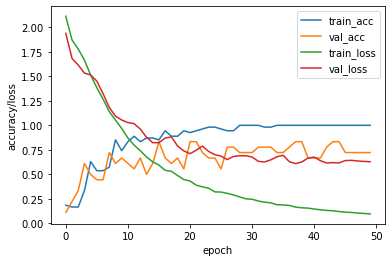

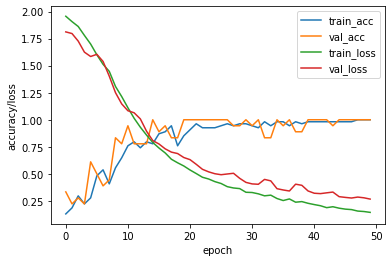

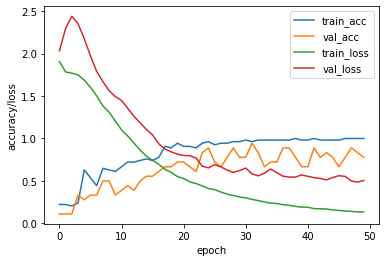

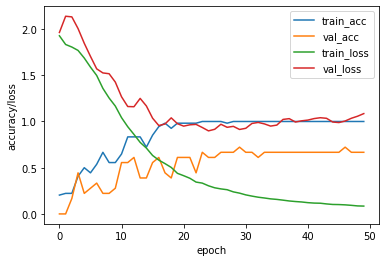

In [61]:
for history in histories3:
    pp.plot_hist(history)

<h2> Expriment4:</h2>

In [14]:
net4 = models.Sequential()
net4.add(layers.Dense((480), input_shape = (480,6)))
net4.add(layers.Flatten())
net4.add(layers.Dense(240,activation='relu'))
net4.add(layers.Dense(120,activation='relu'))
net4.add(layers.Dense(120,activation='relu'))
net4.add(layers.Dense(7, activation = 'softmax'))
net4.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 480, 480)          3360      
_________________________________________________________________
flatten_4 (Flatten)          (None, 230400)            0         
_________________________________________________________________
dense_17 (Dense)             (None, 240)               55296240  
_________________________________________________________________
dense_18 (Dense)             (None, 120)               28920     
_________________________________________________________________
dense_19 (Dense)             (None, 120)               14520     
_________________________________________________________________
dense_20 (Dense)             (None, 7)                 847       
Total params: 55,343,887
Trainable params: 55,343,887
Non-trainable params: 0
__________________________________________

In [15]:
net4.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
net4.save_weights('net4.h5')  # each split will start with same weights so can directly compare results

histories4 = []
results_list4 = []
index = 0
fold = val_split_size



start = tm.time()

for i in range (k):
    print(i)
    val_fold = train_data[index:fold]
    train_fold = np.delete(train_data, np.s_[index:fold],0)

    val_tgt = train_labels[index:fold]
    train_tgt = np.delete(train_labels, np.s_[index:fold])
    
    
    net4.load_weights('net4.h5')
    history = net4.fit(train_fold, train_tgt, epochs = 25, validation_data = (val_fold, val_tgt))

    histories4.append(history)
    
    
    results = net4.evaluate(test_data, test_labels)
    results_list4.append(results)
    print(results)
    
    index = index + val_split_size
    fold = fold + val_split_size

finish = tm.time()
duration4 = finish - start

0
Train on 54 samples, validate on 18 samples
Epoch 1/25
54/54 [==============================] - 2s 30ms/step - loss: 4.0274 - accuracy: 0.1667 - val_loss: 5.0610 - val_accuracy: 0.1667
Epoch 2/25
54/54 [==============================] - 1s 27ms/step - loss: 6.5335 - accuracy: 0.1296 - val_loss: 6.1429 - val_accuracy: 0.0556
Epoch 3/25
54/54 [==============================] - 1s 27ms/step - loss: 5.5996 - accuracy: 0.1111 - val_loss: 5.3485 - val_accuracy: 0.1111
Epoch 4/25
54/54 [==============================] - 1s 26ms/step - loss: 3.7186 - accuracy: 0.2037 - val_loss: 2.0583 - val_accuracy: 0.2222
Epoch 5/25
54/54 [==============================] - 1s 27ms/step - loss: 1.8932 - accuracy: 0.3148 - val_loss: 1.9089 - val_accuracy: 0.3889
Epoch 6/25
54/54 [==============================] - 1s 27ms/step - loss: 2.0365 - accuracy: 0.3333 - val_loss: 1.8732 - val_accuracy: 0.1111
Epoch 7/25
54/54 [==============================] - 1s 27ms/step - loss: 1.7289 - accuracy: 0.2778 - val_los

In [16]:
avg = np.mean(results_list4, axis=0)
std_dev = np.std(results_list4, axis=0)
print('Average loss and accuracy scores were: ', avg)
print('Standard deviation for loss & accuracy: ', std_dev)
print('Duration in seconds: ', int(duration4))

Average loss and accuracy scores were:  [0.54580935 0.75000001]
Standard deviation for loss & accuracy:  [0.06449396 0.05527708]
Duration in seconds:  145


<h2> Expriment5:</h2>

In [17]:
net5 = models.Sequential()
net5.add(layers.Dense((480), input_shape = (480,6)))
net5.add(layers.Flatten())
net5.add(layers.Dense(360,activation='relu'))
net5.add(layers.Dense(360,activation='relu'))
net5.add(layers.Dense(240,activation='relu'))
net5.add(layers.Dense(7, activation = 'softmax'))
net5.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 480, 480)          3360      
_________________________________________________________________
flatten_5 (Flatten)          (None, 230400)            0         
_________________________________________________________________
dense_22 (Dense)             (None, 360)               82944360  
_________________________________________________________________
dense_23 (Dense)             (None, 360)               129960    
_________________________________________________________________
dense_24 (Dense)             (None, 240)               86640     
_________________________________________________________________
dense_25 (Dense)             (None, 7)                 1687      
Total params: 83,166,007
Trainable params: 83,166,007
Non-trainable params: 0
__________________________________________

In [18]:
net5.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
net5.save_weights('net5.h5')  # each split will start with same weights so can directly compare results

histories5 = []
results_list5 = []
index = 0
fold = val_split_size



start = tm.time()

for i in range (k):
    print(i)
    val_fold = train_data[index:fold]
    train_fold = np.delete(train_data, np.s_[index:fold],0)

    val_tgt = train_labels[index:fold]
    train_tgt = np.delete(train_labels, np.s_[index:fold])
    
    
    net5.load_weights('net5.h5')
    history = net5.fit(train_fold, train_tgt, epochs = 25, validation_data = (val_fold, val_tgt))

    histories5.append(history)
    
    
    results = net5.evaluate(test_data, test_labels)
    results_list5.append(results)
    print(results)
    
    index = index + val_split_size
    fold = fold + val_split_size

finish = tm.time()
duration5 = finish - start

0
Train on 54 samples, validate on 18 samples
Epoch 1/25
54/54 [==============================] - 3s 47ms/step - loss: 4.5390 - accuracy: 0.1111 - val_loss: 6.6134 - val_accuracy: 0.2222
Epoch 2/25
54/54 [==============================] - 2s 40ms/step - loss: 9.2058 - accuracy: 0.1667 - val_loss: 10.2480 - val_accuracy: 0.0556
Epoch 3/25
54/54 [==============================] - 2s 40ms/step - loss: 8.7686 - accuracy: 0.1481 - val_loss: 3.5982 - val_accuracy: 0.2778
Epoch 4/25
54/54 [==============================] - 2s 40ms/step - loss: 3.9425 - accuracy: 0.2778 - val_loss: 4.5796 - val_accuracy: 0.3889
Epoch 5/25
54/54 [==============================] - 2s 40ms/step - loss: 3.9363 - accuracy: 0.3519 - val_loss: 2.5044 - val_accuracy: 0.6111
Epoch 6/25
54/54 [==============================] - 2s 39ms/step - loss: 2.1369 - accuracy: 0.4444 - val_loss: 1.7686 - val_accuracy: 0.2222
Epoch 7/25
54/54 [==============================] - 2s 40ms/step - loss: 1.5409 - accuracy: 0.3704 - val_lo

In [19]:
avg = np.mean(results_list5, axis=0)
std_dev = np.std(results_list5, axis=0)
print('Average loss and accuracy scores were: ', avg)
print('Standard deviation for loss & accuracy: ', std_dev)
print('Duration in seconds: ', int(duration5))

Average loss and accuracy scores were:  [0.51167821 0.78333335]
Standard deviation for loss & accuracy:  [0.07887788 0.07264831]
Duration in seconds:  218
